# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Exploration

In [3]:
df.shape

(148, 6)

In [4]:
df.size

888

In [5]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [8]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [9]:
df.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [10]:
for i in df:
    print(i)
    print(df[i].unique())
    print("Length of unique values in column ", i, ' :', len(df[i].unique()))
    print(' ')

Company
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in column  Company  : 7
 
Age
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in column  Age  : 30
 
Salary
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in column  Salary  : 41
 
Place
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values in column  Place  : 12
 
Country
['India']
Length of unique values in column  Country  : 1
 
Gender
[0 1]
Length of unique values in column  Gender  : 2
 


In [11]:
df.drop(columns="Country", inplace=True)
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,0
1,Infosys,30.0,NaN,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0
...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,1
144,Infosys,22.0,8787.0,Calcutta,1
145,Infosys,44.0,4034.0,Delhi,1
146,TCS,33.0,5034.0,Mumbai,1


In [12]:
df['Company'] = df['Company'].replace({'Tata Consultancy Services':'TCS','Congnizant': 'CTS','Infosys Pvt Lmt': 'Infosys'}).fillna(df['Company'])
df['Place'] = df['Place'].replace({'Podicherry': 'Pondicherry'}).fillna(df['Place'])

### Data Cleaning

In [13]:
print("Total No. of Duplicate Rows : " , len(df[df.duplicated()]))
print(' ')
print(df[df.duplicated()])

Total No. of Duplicate Rows :  4
 
     Company   Age  Salary     Place  Gender
84       CTS  43.0     NaN    Mumbai       0
130      TCS  21.0  4824.0    Mumbai       0
131  Infosys   NaN  5835.0    Mumbai       0
144  Infosys  22.0  8787.0  Calcutta       1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
# finding outliers in salary using IQR

q1, q2, q3 = df.Salary.quantile([0.25, 0.50, 0.75])
print("q1 = {}, q2 = {}, q3 = {}".format(q1, q2, q3))
IQR = q3 - q1
print("IQR = ", IQR)
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print("Lower_Whisker = {} ,Upper_Whisker = {} ". format(lower, upper))
outliers_salary = df[(df.Salary<lower) | (df.Salary>upper)].Salary.count()
print("Total No outliers in salary = ", outliers_salary)
# df_without_outlier = df[(df['price_per_sqft']>lower)&(df['price_per_sqft']<upper)]
# df_without_outlier

q1 = 3030.0, q2 = 5000.0, q3 = 8000.0
IQR =  4970.0
Lower_Whisker = -4425.0 ,Upper_Whisker = 15455.0 
Total No outliers in salary =  0


In [16]:
# finding outliers in Age using IQR

q1, q2, q3 = df.Age.quantile([0.25, 0.50, 0.75])
print("q1 = {}, q2 = {}, q3 = {}".format(q1, q2, q3))
IQR = q3 - q1
print("IQR = ", IQR)
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print("Lower_Whisker = {} ,Upper_Whisker = {} ". format(lower, upper))
outliers = df[(df.Age<lower) | (df.Age>upper)].Age.count()
print("Total No. No outliers in Age = ", outliers)

q1 = 22.0, q2 = 33.0, q3 = 37.5
IQR =  15.5
Lower_Whisker = -1.25 ,Upper_Whisker = 60.75 
Total No. No outliers in Age =  0


In [17]:
# Total no . of null values in each column
print("Total null values in Age column before : ", df['Age'].isnull().sum())

Total null values in Age column before :  17


In [18]:
print("Total no of rows with Age = 0 : ", len(df[df.Age==0]))

# Replace the value 0 in age as NaN
df['Age'].replace(0, np.nan, inplace=True)


Total no of rows with Age = 0 :  6


In [19]:
print("Total null values in Age column after : ", df['Age'].isnull().sum())

Total null values in Age column after :  23


In [20]:
# Filling Null Values

# categorical Column
df['Company'].fillna(df['Company'].mode()[0], inplace = True)
df['Place'].fillna(df['Place'].mode()[0], inplace = True)

# Numerical column
df['Salary'].fillna((df['Salary'].mean()), inplace = True)
df['Age'].fillna((df['Age'].mean()), inplace = True)

df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

### Data Analysis

In [21]:
print('Total no. of employees with age>40 and salary<5000 : ', len(df[(df.Age>40) & (df.Salary<5000)]))
print(' ')
df[(df.Age>40) & (df.Salary<5000)]

Total no. of employees with age>40 and salary<5000 :  15
 


,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


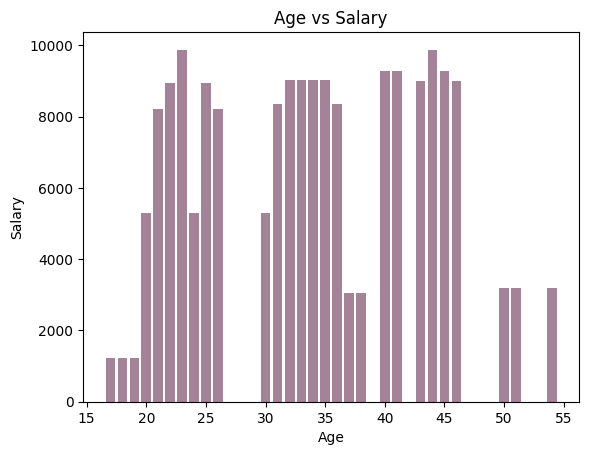

In [22]:
# Age vs Salary

x = df.Age
y = df.Salary
plt.bar(x, y, color='#a48399')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

In [23]:
#  Number of people from each place
df1=df.groupby(['Place']).size().reset_index(name='No of people')
df1

,Place,No of people
0,Bhopal,1
1,Calcutta,32
2,Chennai,14
3,Cochin,13
4,Delhi,14
5,Hyderabad,8
6,Mumbai,48
7,Nagpur,1
8,Noida,8
9,Pondicherry,3


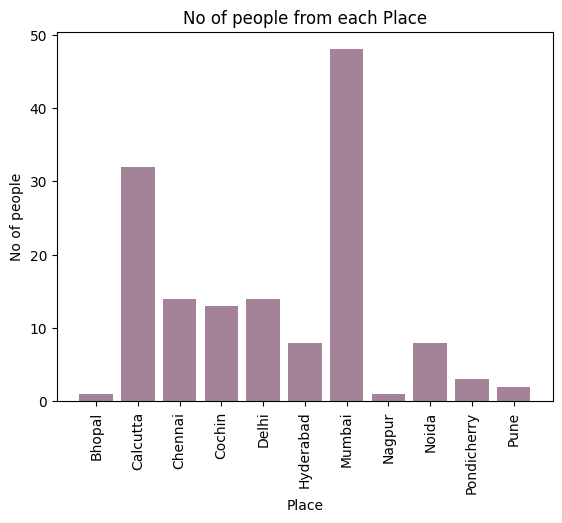

In [24]:
#  Number of people from each place visualisation

plt.bar(df1['Place'], df1['No of people'], color='#a48399')
plt.xticks(rotation ='vertical')
plt.xlabel('Place')
plt.ylabel('No of people')
plt.title('No of people from each Place')
plt.show()

### Data Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [26]:
# one-hot encoding

In [27]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Company", "Place", "Age", "Salary"])
print(df_one_hot_encoded )

     Gender  Company_CTS  Company_Infosys  Company_TCS  Place_Bhopal  \
0         0        False            False         True         False   
1         0        False             True        False         False   
2         0        False            False         True         False   
3         0        False             True        False         False   
4         0        False            False         True         False   
..      ...          ...              ...          ...           ...   
142       0        False             True        False         False   
143       1        False            False         True         False   
145       1        False             True        False         False   
146       1        False            False         True         False   
147       0        False             True        False         False   

     Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  \
0             False           True         False        False   
1    

In [28]:
cols_to_encode = ["Company", "Place"]
new_encoded_cols_names = []

# Create a list of new columns names
for i in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[i].unique().tolist()]

print(new_encoded_cols_names)
print(" ")
# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
df_one_hot_encoded = df.join(df_encoded)

print(df_one_hot_encoded)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Pondicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune']
 
     Company   Age       Salary     Place  Gender  is_TCS  is_Infosys  is_CTS  \
0        TCS  20.0  5283.471074   Chennai       0     0.0         0.0     1.0   
1    Infosys  30.0  5283.471074    Mumbai       0     0.0         1.0     0.0   
2        TCS  35.0  2300.000000  Calcutta       0     0.0         0.0     1.0   
3    Infosys  40.0  3000.000000     Delhi       0     0.0         1.0     0.0   
4        TCS  23.0  4000.000000    Mumbai       0     0.0         0.0     1.0   
..       ...   ...          ...       ...     ...     ...         ...     ...   
142  Infosys  22.0  8202.000000    Mumbai       0     0.0         0.0     1.0   
143      TCS  33.0  9024.000000  Calcutta       1     0.0         1.0     0.0   
145  Infosys  44.0  4034.000000     Delhi       1     NaN         NaN     NaN   
146

In [29]:
# Label Encoding

In [30]:
label_encoder = LabelEncoder()
for i in df[["Salary", "Company","Place"]]:
    df[i] = label_encoder.fit_transform(df[i])
df

,Company,Age,Salary,Place,Gender
0,2,20.0,21,2,0
1,1,30.0,21,6,0
2,2,35.0,3,1,0
3,1,40.0,5,4,0
4,2,23.0,12,6,0
...,...,...,...,...,...
142,1,22.0,33,6,0
143,2,33.0,38,1,1
145,1,44.0,13,4,1
146,2,33.0,19,6,1


### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
# StandardScaler()
# create Scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Print the scaled data
print(scaled_data.round(3))

[[ 1.019 -1.467  0.14  -0.893 -0.535]
 [-0.214 -0.249  0.14   0.751 -0.535]
 [ 1.019  0.361 -1.368 -1.304 -0.535]
 [-0.214  0.97  -1.201 -0.071 -0.535]
 [ 1.019 -1.102 -0.614  0.751 -0.535]
 [-0.214  0.    -0.195 -1.304 -0.535]
 [ 1.019  0.     0.558 -0.893  1.871]
 [-0.214 -1.102  0.81   0.751  1.871]
 [ 1.019  0.239  1.061 -1.304  1.871]
 [-1.448  1.579  1.48  -0.071 -0.535]
 [-1.448 -1.102  0.14   0.751 -0.535]
 [-1.448  0.239 -1.619 -1.304 -0.535]
 [-1.448  1.579  0.14  -0.893 -0.535]
 [-1.448 -1.711 -1.536  0.751 -0.535]
 [-0.214  0.97  -1.201 -1.304 -0.535]
 [ 1.019 -1.102 -1.201 -0.071 -0.535]
 [-0.214 -1.102 -1.117  1.983 -0.535]
 [ 1.019  0.239 -0.195 -0.482 -0.535]
 [ 1.019 -1.224  0.14  -0.893 -0.535]
 [-0.214 -0.005  0.14   0.751 -0.535]
 [ 1.019  0.604 -0.949 -1.304 -0.535]
 [-0.214  2.188 -0.866 -0.071 -0.535]
 [ 1.019 -1.346 -0.279  0.751 -0.535]
 [-0.214  0.     0.475 -0.482 -0.535]
 [ 1.019  0.     0.893 -0.893  1.871]
 [-0.214 -1.102  1.396  0.751  1.871]
 [ 1.019  0.

In [33]:
# MinMaxScaler()
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)


# Print the scaled data
print(scaled_data.round(2))

[[1.   0.08 0.52 0.2  0.  ]
 [0.5  0.35 0.52 0.6  0.  ]
 [1.   0.49 0.08 0.1  0.  ]
 [0.5  0.62 0.12 0.4  0.  ]
 [1.   0.16 0.3  0.6  0.  ]
 [0.5  0.41 0.43 0.1  0.  ]
 [1.   0.41 0.65 0.2  1.  ]
 [0.5  0.16 0.73 0.6  1.  ]
 [1.   0.46 0.8  0.1  1.  ]
 [0.   0.76 0.92 0.4  0.  ]
 [0.   0.16 0.52 0.6  0.  ]
 [0.   0.46 0.   0.1  0.  ]
 [0.   0.76 0.52 0.2  0.  ]
 [0.   0.03 0.02 0.6  0.  ]
 [0.5  0.62 0.12 0.1  0.  ]
 [1.   0.16 0.12 0.4  0.  ]
 [0.5  0.16 0.15 0.9  0.  ]
 [1.   0.46 0.43 0.3  0.  ]
 [1.   0.14 0.52 0.2  0.  ]
 [0.5  0.41 0.52 0.6  0.  ]
 [1.   0.54 0.2  0.1  0.  ]
 [0.5  0.89 0.22 0.4  0.  ]
 [1.   0.11 0.4  0.6  0.  ]
 [0.5  0.41 0.62 0.3  0.  ]
 [1.   0.41 0.75 0.2  1.  ]
 [0.5  0.16 0.9  0.6  1.  ]
 [1.   0.46 0.85 0.1  1.  ]
 [0.   0.76 0.98 0.4  1.  ]
 [0.   0.16 1.   0.6  1.  ]
 [0.   0.49 0.05 0.3  0.  ]
 [0.   0.78 0.78 0.2  0.  ]
 [0.   0.08 0.1  0.6  0.  ]
 [0.5  0.76 0.32 0.1  0.  ]
 [1.   0.51 0.48 0.6  0.  ]
 [0.5  0.24 0.82 0.6  0.  ]
 [1.   0.49 0.95 0.6